In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df_long = pd.read_csv("../data/proc/labelled_daily_goals_long.csv")

In [4]:
len(df_long)

15575

In [5]:
df_long.head()

,ParticipantIdentifier,trial_date,ResultIdentifier,Answers,label
0,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-01,DAILY_goal1_set,Keep working on psych paper,School
1,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-02,DAILY_goal1_set,Keep working on psych paper,School
2,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-03,DAILY_goal1_set,Finish and hand in psych rough draft,School
3,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-04,DAILY_goal1_set,Practice biology FSG questions,School
4,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-05,DAILY_goal1_set,Practice biology FSG questions,School


In [6]:
categories = [
    "School",
    "Other",
    "Exercise",
    "Work",
    "MentalPersonal_Health",
    "Sleep",
    "Diet",
    "Housework",
    "Hobby",
    "Time_Management",
    "Learning",
    "Reading_leisure",
    "Medical_Health",
    "Social_life",
    "Admin",
    "Self-Improvement",
    "Friends",
    "Future_Planning",
    "Family",
    "Punctuality",
    "Cooking"
]

In [7]:
grouped = (
    df_long
    .groupby(["ParticipantIdentifier", "label"])
    .size()
    .reset_index(name="count")
    .sort_values("count", ascending=False)
)

grouped.head()


,ParticipantIdentifier,label,count
1207,bf670311-c590-473a-98ab-d719ebf0f2ab,School,149
687,63f4637d-9f05-4561-8995-667470be3c7c,School,149
228,1dd79a79-dd14-4932-b81b-16f95bbcd796,School,146
474,3e1d1276-0e73-4457-9911-f189b0ed0778,School,146
1170,b50ef395-6d97-4314-b397-e5d755595dc2,School,142


In [8]:
grouped_wide = grouped.pivot_table(
    index=['ParticipantIdentifier'],
    columns='label',
    values='count',
    aggfunc='first'
).reset_index()

grouped_wide.head()

label,ParticipantIdentifier,Admin,Alcohol_drug,Community involvement,Cooking,Culture,Diet,Driving,Education,Environment,...,SocialMedia,Social_life,Sports_playing,TV_Streaming,Time_Management,Travel,Video games,Volunteering,Work,Writing
0,0151d9f1-1644-4437-805e-02f5e244a690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
1,02f48bee-6e86-437c-9394-10ae57dadd14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,1.0,NaN,7.0,NaN
2,0501ba67-3406-4779-aff1-878a0e9f7885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,06af7782-cd70-4938-8e67-b6d98b34b665,NaN,NaN,NaN,3.0,NaN,9.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,075f7c4e-edea-4d64-8844-f046a1beb770,NaN,NaN,NaN,NaN,NaN,37.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN


In [9]:
grouped_wide = grouped_wide.fillna(0) 

In [10]:
grouped_wide["#_goals"] = grouped_wide[categories].sum(axis=1, skipna=True)

In [11]:
grouped_wide.head()

label,ParticipantIdentifier,Admin,Alcohol_drug,Community involvement,Cooking,Culture,Diet,Driving,Education,Environment,...,Social_life,Sports_playing,TV_Streaming,Time_Management,Travel,Video games,Volunteering,Work,Writing,#_goals
0,0151d9f1-1644-4437-805e-02f5e244a690,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,160.0
1,02f48bee-6e86-437c-9394-10ae57dadd14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0,0.0,136.0
2,0501ba67-3406-4779-aff1-878a0e9f7885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,96.0
3,06af7782-cd70-4938-8e67-b6d98b34b665,0.0,0.0,0.0,3.0,0.0,9.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,129.0
4,075f7c4e-edea-4d64-8844-f046a1beb770,0.0,0.0,0.0,0.0,0.0,37.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,104.0


In [12]:
# grades_path = "../data/raw/all_grades.csv"
grades_path = "/Users/farhan/projects/NROC90/results/academic_results.csv"

cols = [
    "ParticipantIdentifier",
    "grade"
]

gradesDF = pd.read_csv(grades_path)[cols]
gradesDF.head()

,ParticipantIdentifier,grade
0,852c24f8-36d6-4bbd-b79f-7f6fe64d1275,74.566667
1,630ece82-994f-4aef-b2e3-46760583e453,82.666667
2,f55d6d94-8602-46cb-b3bd-53ea561eb296,66.750000
3,4e465685-8d64-4b22-8b6c-9409f9eb3c02,70.666667
4,63f4637d-9f05-4561-8995-667470be3c7c,77.200000


In [13]:
len(gradesDF)

62

In [14]:
freq_x_grade = grouped_wide.merge(
    gradesDF,
    on="ParticipantIdentifier",
    how="inner"
)

In [15]:
selected_goal_categories = [
    "#_goals",
    "grade",
    "School",
    "Learning",
    "Time_Management",
    "Sleep",
    "Exercise",
    "MentalPersonal_Health",
    "Social_life",
    "Work",
    "Self-Improvement",
]

plotDF = freq_x_grade[selected_goal_categories]

In [16]:
plotDF["School_Learning"] = plotDF["School"] + plotDF["Learning"]

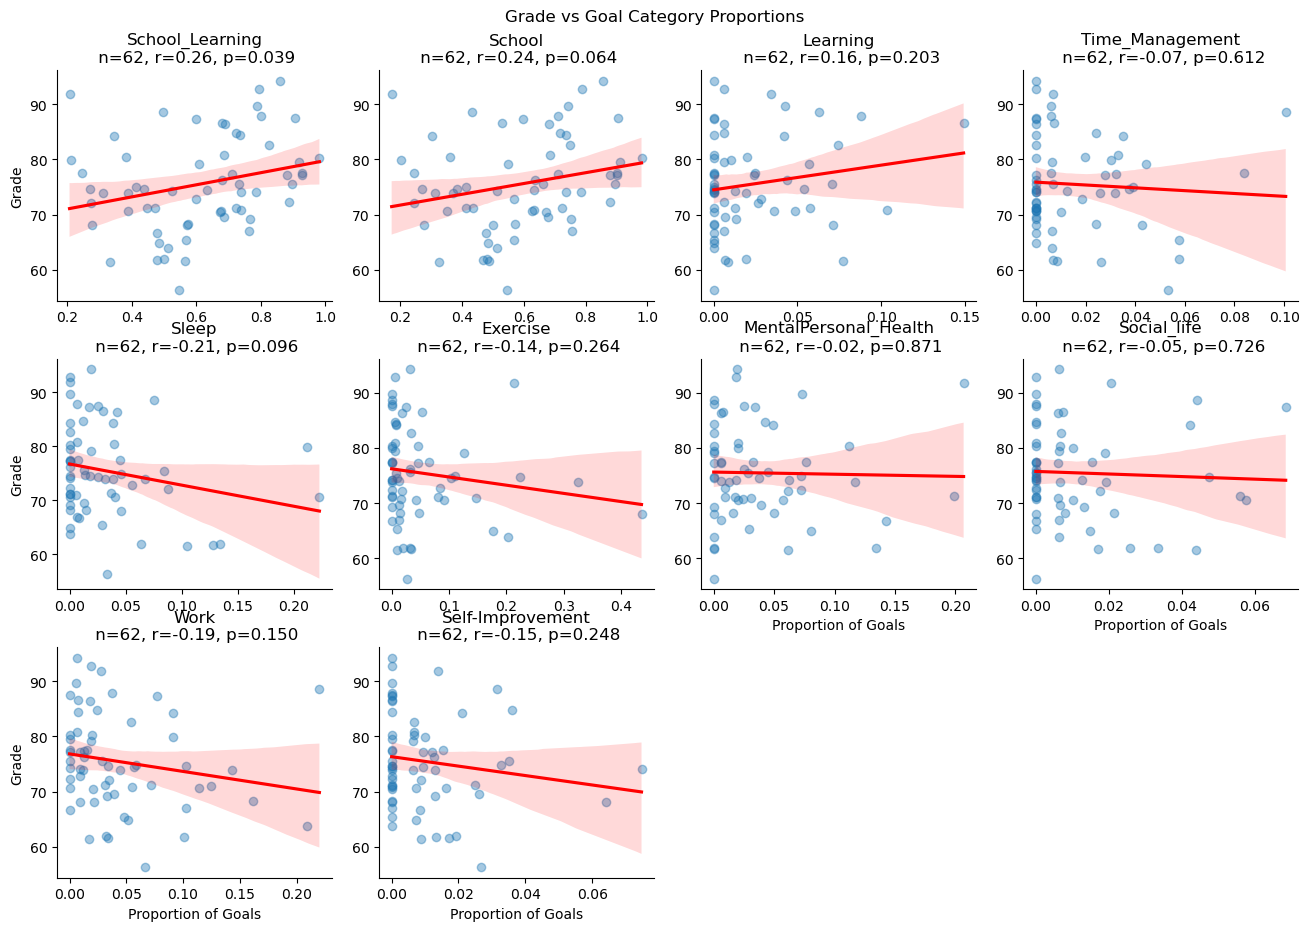

In [17]:
goal_categories = [
    "School_Learning", "School", "Learning", "Time_Management", "Sleep", "Exercise",
    "MentalPersonal_Health", "Social_life", "Work", "Self-Improvement"
]

# proportions
for cat in goal_categories:
    plotDF[f"{cat}_prop"] = plotDF[cat] / plotDF["#_goals"]

# tidy long df
long_df = plotDF.melt(
    id_vars=["grade"],
    value_vars=[f"{cat}_prop" for cat in goal_categories],
    var_name="Category", value_name="Proportion"
)
long_df["Category"] = long_df["Category"].str.replace("_prop", "", regex=False)

# compute n, r, p for each category
stats_dict = {}
for cat in goal_categories:
    sub = long_df[long_df["Category"] == cat].dropna(subset=["Proportion", "grade"])
    n = len(sub)
    if n > 1:
        r, p = pearsonr(sub["Proportion"], sub["grade"])
        stats_dict[cat] = (n, r, p)
    else:
        stats_dict[cat] = (n, float("nan"), float("nan"))

# facet scatter+regression
g = sns.FacetGrid(long_df, col="Category", col_wrap=4, sharex=False, sharey=False, height=3, aspect=1.1)
g.map_dataframe(sns.regplot, x="Proportion", y="grade",
                scatter_kws={"alpha":0.4}, line_kws={"color":"red"})

# custom titles with n, r, p
def title_with_stats(cat):
    n, r, p = stats_dict.get(cat, (0, float("nan"), float("nan")))
    if n > 1:
        return f"{cat}\n n={n}, r={r:.2f}, p={p:.3f}"
    else:
        return f"{cat}\n n={n}, r=NA, p=NA"

for ax, cat in zip(g.axes.flatten(), g.col_names):
    ax.set_title(title_with_stats(cat))

g.set_axis_labels("Proportion of Goals", "Grade")
g.fig.suptitle("Grade vs Goal Category Proportions", y=1.03)
plt.show()


In [18]:
plotDF[f"{cat}_prop"] = plotDF[cat] / plotDF["#_goals"]